### Convolutional Neural Network(CNN) integrate multi-omics data

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the dataset and prepare data
df = pd.read_excel('Presentation - omics challenge Data.xlsx', index_col=0, header=1)
target = df['Label']
df = df.drop(['Label'], axis=1)

# Scaling the data
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

# Encode the labels to binary format
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(target)  # 'Control' becomes 0, 'CRC' becomes 1
y_encoded = to_categorical(y_encoded)  # Convert to categorical for CNN

# Reshape the data into a 2D "image" format
# Reshape each sample to a 2D structure (20x26) to match 520 features
image_size = (20, 26)  # Adjust if your data can fit into another shape
X_reshaped = df_scaled.values.reshape(24, *image_size, 1)  # Add channel dimension for grayscale

# Check shapes to ensure compatibility
print("X_reshaped shape:", X_reshaped.shape)  # Expected: (num_samples, 13, 6, 1)
print("y_encoded shape:", y_encoded.shape)    # Expected: (num_samples, 2)



# Split the data (ensure X_reshaped and y_encoded have compatible shapes)
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded, stratify=y_encoded, random_state=42)

# Define the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")




X_reshaped shape: (24, 20, 26, 1)
y_encoded shape: (24, 2)
Epoch 1/50


C:\ProgramData\Anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5714 - loss: 0.6944 - val_accuracy: 0.5000 - val_loss: 0.6961
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.5000 - loss: 0.6790 - val_accuracy: 0.5000 - val_loss: 0.6982
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.6429 - loss: 0.6840 - val_accuracy: 0.2500 - val_loss: 0.6993
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.5714 - loss: 0.6931 - val_accuracy: 0.2500 - val_loss: 0.6999
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.5714 - loss: 0.6794 - val_accuracy: 0.7500 - val_loss: 0.7002
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.6429 - loss: 0.6674 - val_accuracy: 0.7500 - val_loss: 0.7007
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.7143 - loss: 0.6717 - val_accuracy: 0.5000 - val_loss: 0.7017
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.5714 - loss: 0.6821 - val_accuracy: 0.5000 - val_loss: 0.7017
Epoch 

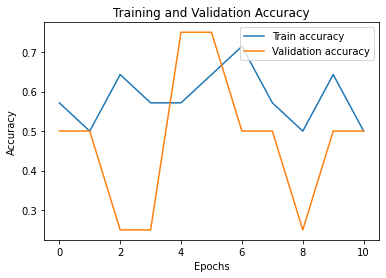

In [8]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()